## Visualise the historical flooding event in Kuching city, Sarawak

The data is collected from Department of Irrigation and Drainage, Sarawak and owned by challange owner

In [2]:
import pandas as pd
import plotly.express as px

## Read data

In [3]:
df = pd.read_csv('/Users/kang/Documents//Hackathon_2023/Data/flood-history.csv')
df.head()

,locations,Occurance,max-height,latest-occurance,latitude,longitude
0,KPG SINAR BUDI BARU,19.0,1.8,Mar-23,1.49874,110.30794
1,desa wira,15.0,1.2,Mar-23,1.50403,110.30248
2,jalan batu kawa,14.0,1.6,Feb-21,1.50945,110.30221
3,jalan ketitir,8.0,1.0,Mar-23,1.51025,110.31879
4,batu lintang,8.0,1.3,Mar-23,1.51029,110.33093


## Classify it into high risk, low risk and moderate

In [4]:
bins = [0, 3, 6, 20]
labels = ['Low Risk', 'Medium Risk', 'High Risk']
df['Risk_Level'] = pd.cut(df['Occurance'], bins=bins, labels=labels, right=False)
df.head()

,locations,Occurance,max-height,latest-occurance,latitude,longitude,Risk_Level
0,KPG SINAR BUDI BARU,19.0,1.8,Mar-23,1.49874,110.30794,High Risk
1,desa wira,15.0,1.2,Mar-23,1.50403,110.30248,High Risk
2,jalan batu kawa,14.0,1.6,Feb-21,1.50945,110.30221,High Risk
3,jalan ketitir,8.0,1.0,Mar-23,1.51025,110.31879,High Risk
4,batu lintang,8.0,1.3,Mar-23,1.51029,110.33093,High Risk


# Visualise the hotspot

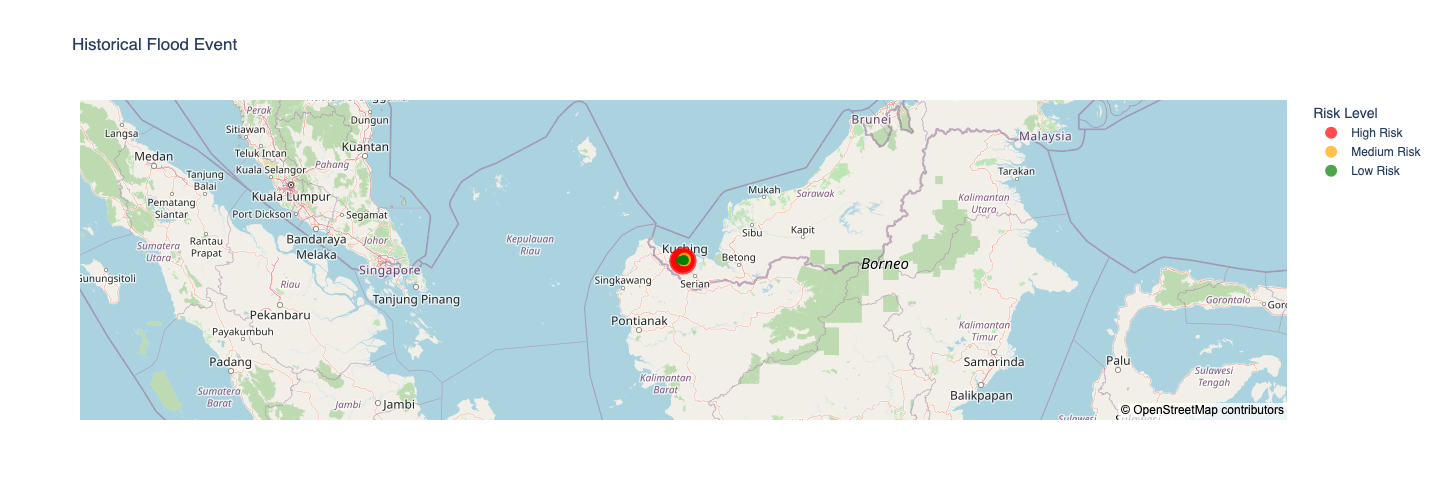

In [8]:
import plotly.express as px

# Set your Mapbox token here
mapbox_token = 'open-street-map'

# Plotting the map using Plotly
fig = px.scatter_mapbox(df, 
                        lat='latitude', 
                        lon='longitude', 
                        color='Risk_Level',
                        color_discrete_map={'Low Risk': 'green', 'Medium Risk': 'orange', 'High Risk': 'red'},
                        zoom=5, 
                        size='Occurance',
                        # mapbox_style='streets',
                        title='Historical Flood Event',
                        labels={'Risk_Level': 'Risk Level'})

# Update Mapbox token
fig.update_layout(mapbox_style='open-street-map')
# Adjust font style
fig.update_layout(
    font=dict(
        family='Helvetica',  # Set the desired font style, e.g., 'Arial', 'Times New Roman', etc.
        size=12,         # Adjust the font size as needed
    )
)

fig.update_layout(
    width=900,  # Set the width of the plot
    height=500,
    # showlegend=False
)

fig.show()
# Save the figure as HTML
# fig.write_html('/Users/kang/Desktop/event_severity_map.html')